In [1]:
import numpy as np
from scipy.io import wavfile
import wave
import matplotlib
import cv2
import matplotlib.pyplot as plt
import os.path
import sys
from PIL import Image
from moviepy.editor import *
import matplotlib.image as mpimg
import math
from scipy.ndimage import shift as sh

In [3]:
#PART A
# Extract signal from Wav File

spf = wave.open("SilentKnight.wav", "r")
signal = spf.readframes(-1)
signal = np.frombuffer(signal, dtype=np.dtype(int))

In [4]:
#Signal is splitted to an interval array named data --  (4410 is given) 

data=[[0 for x in range(4410)] for y in range(int(len(signal)/4410)+1)]
a=0
for j in range(int(len(signal)/4410)+1):
    for i in range(4410):
        if(j*4410+i<int(len(signal))):
            data[j][i]=signal[a]
        else:
            data[j][i]=0
        a=a+1
    

In [5]:
#Find fft for each interval

new_data=np.copy(data)
for i in range(len(data)):
    new_data[i]=10*np.log10(np.abs(np.fft.fft(new_data[i]))+0.001)

In [21]:
#For 10 fps , creates an image sequence of the plots of each interval

imageslist = [ ]
plt.ioff()
for i in range(len(new_data)):
    fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(10,6))
    plt.axis('off')
    plt.xlim(0,2205)     #Use the first half of fft
    plt.ylim(90,120)
    plt.bar(np.arange(2205),new_data[i][:2205])
    plt.savefig('foo.png',bbox_inches='tight',pad_inches=0)
    a=cv2.imread('foo.png')[...,::-1]
    plt.close()      #No plot
    imageslist.append(a)
#Add the p r o c e s s e d images t o the l i s t .
clip = ImageSequenceClip (imageslist , fps =10)
clip.write_videofile ( 'part1video.mp4' , codec='mpeg4' )

[MoviePy] >>>> Building video part1video.mp4
[MoviePy] Writing video part1video.mp4


100%|███████████████████████████████████████████████████████████████████████████████| 823/823 [00:03<00:00, 261.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: part1video.mp4 



In [22]:
#Combines image sequence and sound

import moviepy.editor as mpe
my_clip = mpe.VideoFileClip('part1video.mp4')
audio_background = mpe.AudioFileClip('SilentKnight.wav')
final_clip = my_clip.set_audio(audio_background)
final_clip.write_videofile('total_output.mp4')

[MoviePy] >>>> Building video total_output.mp4
[MoviePy] Writing audio in total_outputTEMP_MPY_wvf_snd.mp3


100%|█████████████████████████████████████████████████████████████████████████████| 1815/1815 [00:02<00:00, 858.74it/s]


[MoviePy] Done.
[MoviePy] Writing video total_output.mp4


100%|██████████████████████████████████████████████████████████████████████████████▉| 823/824 [00:02<00:00, 336.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: total_output.mp4 



In [23]:
#PART 2
# Extract signal (I named it channel) from Wav File
spf = wave.open("aphex_twin_equation.wav", "r")
channel = spf.readframes(-1)
channel = np.frombuffer(channel, dtype=np.dtype(int))

#Find max
if(-1*(min(channel))>max(channel)):
    maxx=-1*min(channel)
else:
    maxx=max(channel)
#Normalize it
channel=(channel/maxx)

#My window_size and step paremeters
window_size=1024
step=128


In [24]:
#data matrice holds FFTs of the windowed data according to step.
#By smoothing and taking absolute value of data matrices, we get spectrogram

spectrogram= np.zeros((int(len(channel)/step)+1,window_size))
data = np.zeros((int(len(channel)/step)+1,window_size))
a=0
for j in range(0,len(channel),step):
    for i in range(window_size):
        if(j+i<len(channel)):
            data[a][i]=channel[j+i]
        else:
            data[a][i]=0
    a=a+1
spectrogram=10*np.log10(abs(np.fft.fft(data))+0.000001)

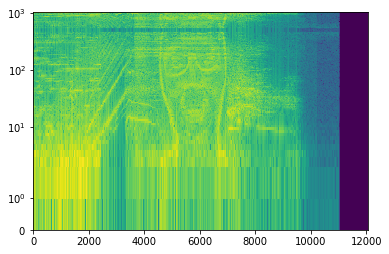

In [25]:
#Plot the spectrogram

fig, ax = plt.subplots()
ax.set_yscale('symlog')
ax.pcolormesh(np.transpose(spectrogram))
plt.show()